Pump it Up: Data Mining the Water Table

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

#Import data

In [68]:
# Upload features from github
test_features = 'https://raw.githubusercontent.com/hwupathum/pumpitup/main/test_features.csv'
train_features = 'https://raw.githubusercontent.com/hwupathum/pumpitup/main/train_features.csv'
train_labels = 'https://raw.githubusercontent.com/hwupathum/pumpitup/main/train_labels.csv'

In [69]:
X_train = pd.read_csv(train_features, index_col='id')
Y_train = pd.read_csv(train_labels, index_col='id')
X_test = pd.read_csv(test_features, index_col='id')

In [70]:
train_data = pd.concat([X_train, Y_train], axis=1)

In [71]:
train_data.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


#Describe data

In [72]:
X_train.shape

(59400, 39)

In [73]:
X_test.shape

(14850, 39)

The dataset contains 39 features and 50000+ data points. Both datasets contain same number of features

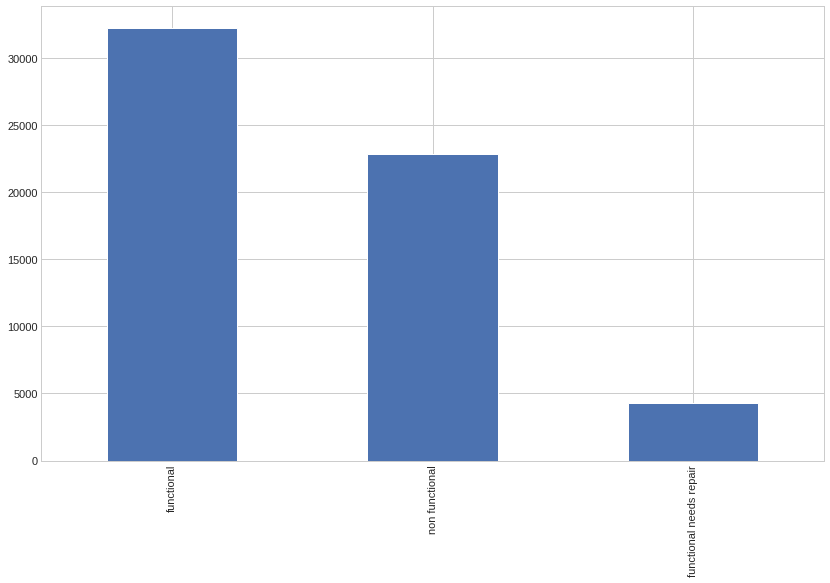

In [74]:
Y_train['status_group'].value_counts().plot(kind='bar')

Classes do not have even distribution

In [75]:
null_col = X_train.isna().sum().to_frame()
null_col[(null_col.T != 0).any()].transpose()

,funder,installer,subvillage,public_meeting,scheme_management,scheme_name,permit
0,3635,3655,371,3334,3877,28166,3056


In [76]:
null_col = X_test.isna().sum().to_frame()
null_col[(null_col.T != 0).any()].transpose()

,funder,installer,subvillage,public_meeting,scheme_management,scheme_name,permit
0,869,877,99,821,969,7092,737


Features with empty values

In [77]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

#Feature analysis

##Numeric data

In [78]:
X_train.describe(exclude=['O'])

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [79]:
X_test.describe(exclude=['O'])

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,322.826983,655.147609,34.061605,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,2510.968644,691.261185,6.593034,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.069455,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,344.000000,34.901215,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,25.000000,1308.000000,37.196594,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


*logitude, num_private, population, construction_year* has missing values (0)

### Location cordinates

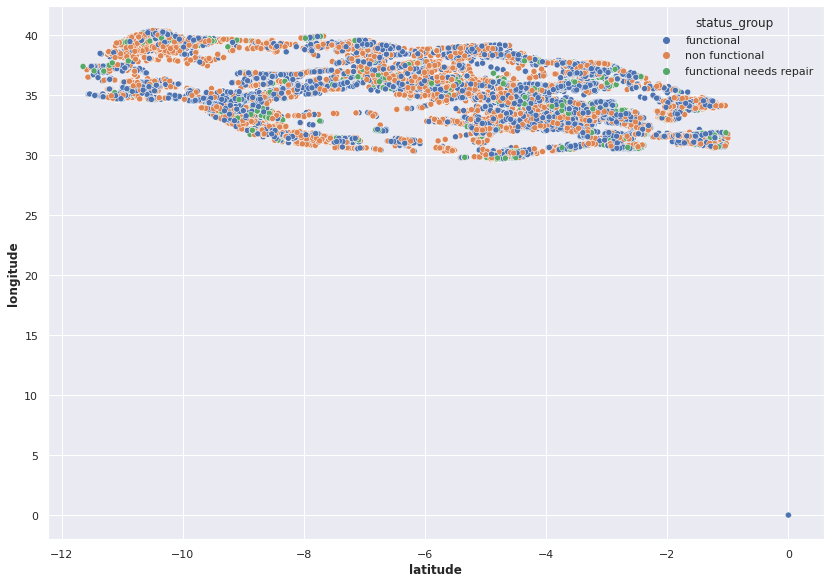

In [80]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='status_group')

Contains outliers

###Population

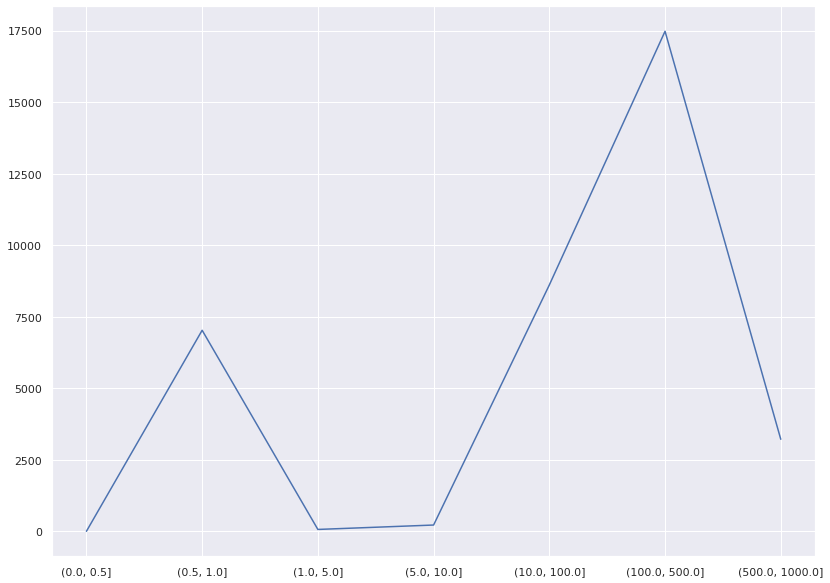

In [81]:
pd.cut(train_data['population'], bins=[0, 0.5, 1, 5, 10, 100, 500, 1000]).value_counts(sort=False).plot()

Lot of the values are 1, which can be an outlier
```
# This is formatted as code
```



##Categorical data

In [82]:
X_train.describe(include=['O'])

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400,55765,55745,59400,59400,59029,59400,59400,59400,56066,59400,55523,31234,56344,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1897,2145,37400,9,19287,21,125,2092,2,1,12,2696,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,59400,36793,682,38852,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


In [83]:
X_test.describe(include=['O'])

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,14850,13981,13973,14850,14850,14751,14850,14850,14850,14029,14850,13881,7758,14113,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850
unique,331,980,1091,10840,9,8443,21,125,1959,2,1,11,1789,2,17,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,2013-02-03,Government Of Tanzania,DWE,none,Lake Victoria,Shuleni,Shinyanga,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,communal standpipe,communal standpipe
freq,138,2215,4349,877,2623,140,1311,625,79,12738,14850,9124,176,9754,6483,6483,6483,10117,13048,6364,6364,12687,12687,8336,8336,4316,4316,11492,7106,8614


 *wpt_name, subvillage* has lot of categories. *recorded_by* is constant for all values. *funder, installer, ward, scheme_management, extraction_type* doesn't have same number of categories in both datasets

###Simmilar features

In [84]:
train_data.groupby(['extraction_type', 'extraction_type_group', 'extraction_type_class']).size()
# All 3 features are almost alike. Therefore I select extration_type_class, which has lowest number of values

extraction_type            extraction_type_group  extraction_type_class
afridev                    afridev                handpump                  1770
cemo                       other motorpump        motorpump                   90
climax                     other motorpump        motorpump                   32
gravity                    gravity                gravity                  26780
india mark ii              india mark ii          handpump                  2400
india mark iii             india mark iii         handpump                    98
ksb                        submersible            submersible               1415
mono                       mono                   motorpump                 2865
nira/tanira                nira/tanira            handpump                  8154
other                      other                  other                     6430
other - mkulima/shinyanga  other handpump         handpump                     2
other - play pump          other hand

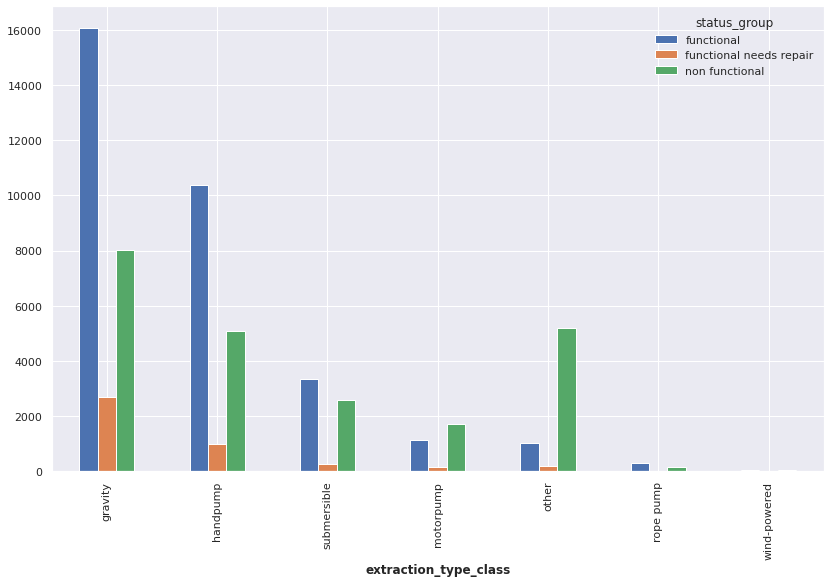

In [85]:
train_data.groupby(['extraction_type_class','status_group'])['status_group'].size().unstack('status_group', fill_value=0).sort_values(by='functional', ascending=False).plot(kind='bar')

In [86]:
train_data.groupby(['source', 'source_type', 'source_class']).size()
# All 3 features are almost alike. Therefore I select source_type

source                source_type           source_class
dam                   dam                   surface           656
hand dtw              borehole              groundwater       874
lake                  river/lake            surface           765
machine dbh           borehole              groundwater     11075
other                 other                 unknown           212
rainwater harvesting  rainwater harvesting  surface          2295
river                 river/lake            surface          9612
shallow well          shallow well          groundwater     16824
spring                spring                groundwater     17021
unknown               other                 unknown            66
dtype: int64

Likewise there are features with simmilar categories


*   quantity - quantity_group
*   payment - payment_type
*   water_quality - quality_group
*   management - management_group
*   source - source_type - source_class
*   extraction_type - extraction_type_group - extraction_type_class

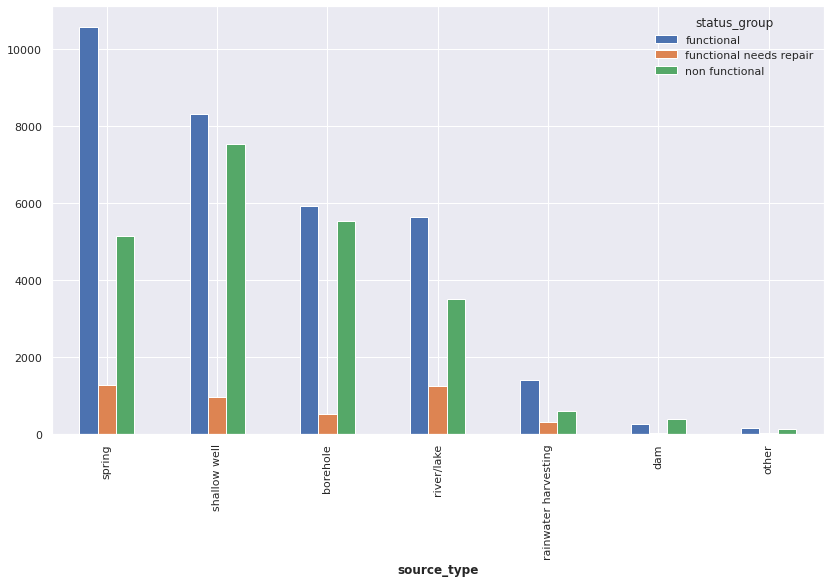

In [87]:
train_data.groupby(['source_type','status_group'])['status_group'].size().unstack('status_group', fill_value=0).sort_values(by='functional', ascending=False).plot(kind='bar')

###Region vs status group

In some regions there is a very high probability of a water point being functional against non-functional

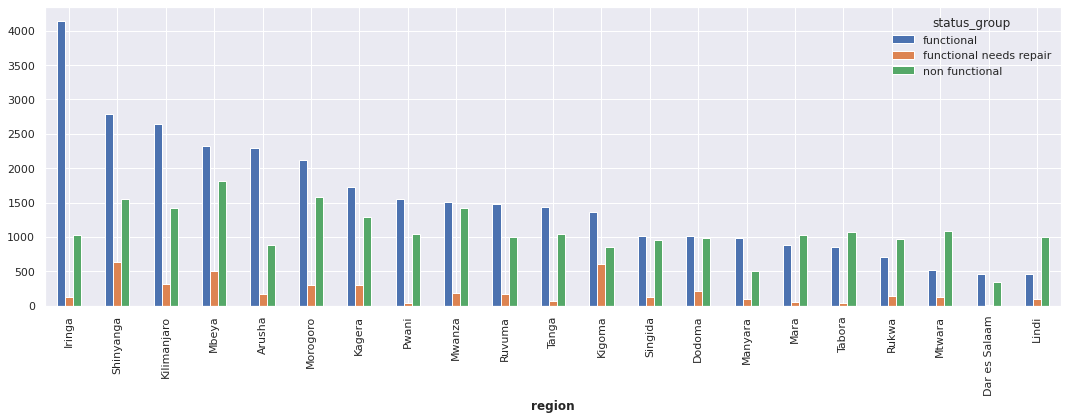

In [88]:
train_data.groupby(['region','status_group'])['status_group'].size().unstack('status_group', fill_value=0).sort_values(by='functional', ascending=False).plot(figsize=(15,6), kind='bar')

###Water quality vs status_group

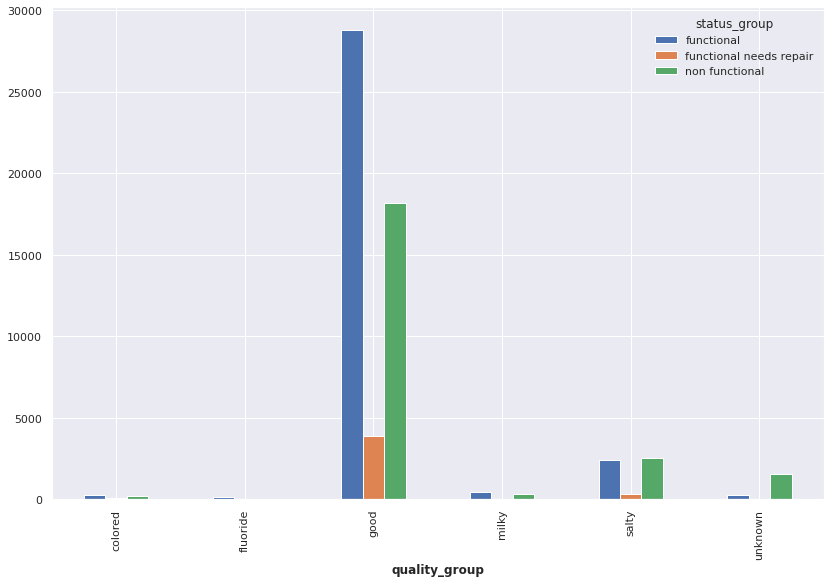

In [89]:
train_data.groupby(['quality_group','status_group'])['status_group'].size().unstack('status_group', fill_value=0).plot(kind='bar')

###Water quantity vs status_group

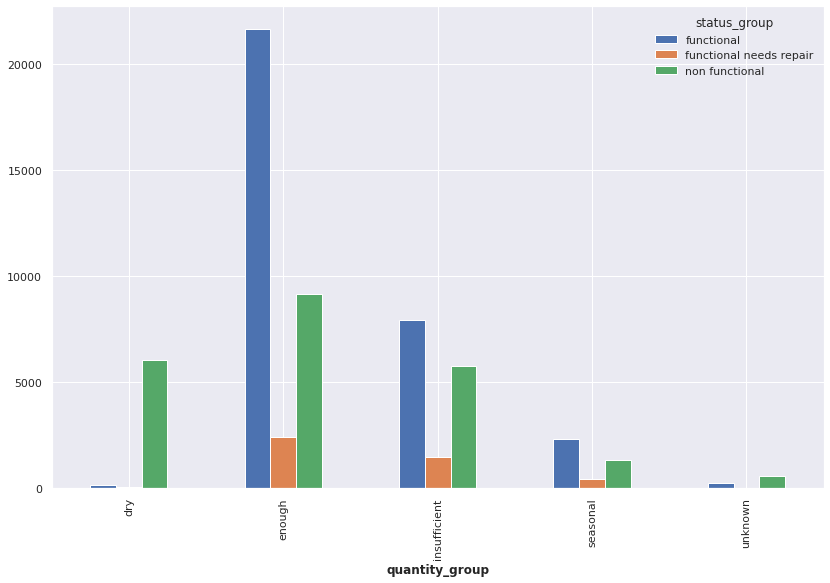

In [90]:
train_data.groupby(['quantity_group','status_group'])['status_group'].size().unstack('status_group', fill_value=0).plot(kind='bar')

Almost all dry wells are non-functional

###Waterpoint vs status_group

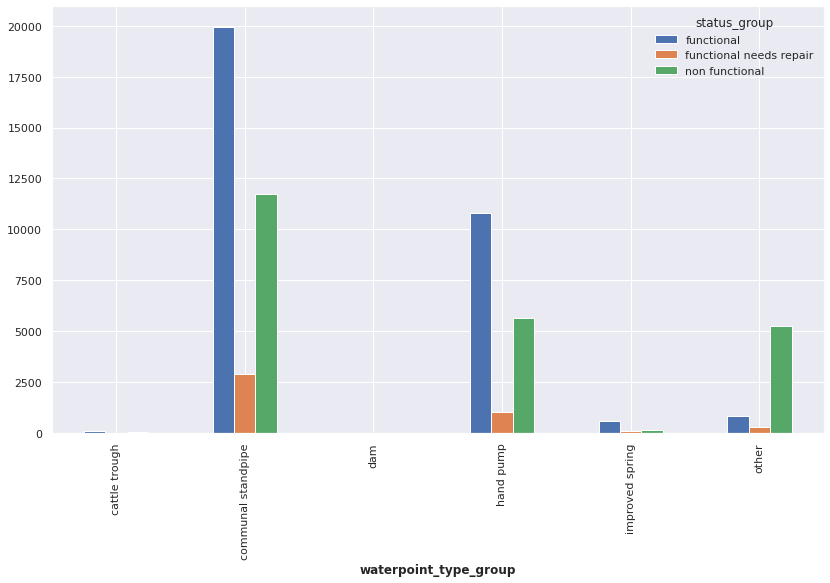

In [91]:
train_data.groupby(['waterpoint_type_group','status_group'])['status_group'].size().unstack('status_group', fill_value=0).plot(kind='bar')

Other type waterpoints are non-functional

###Payment vs status_group

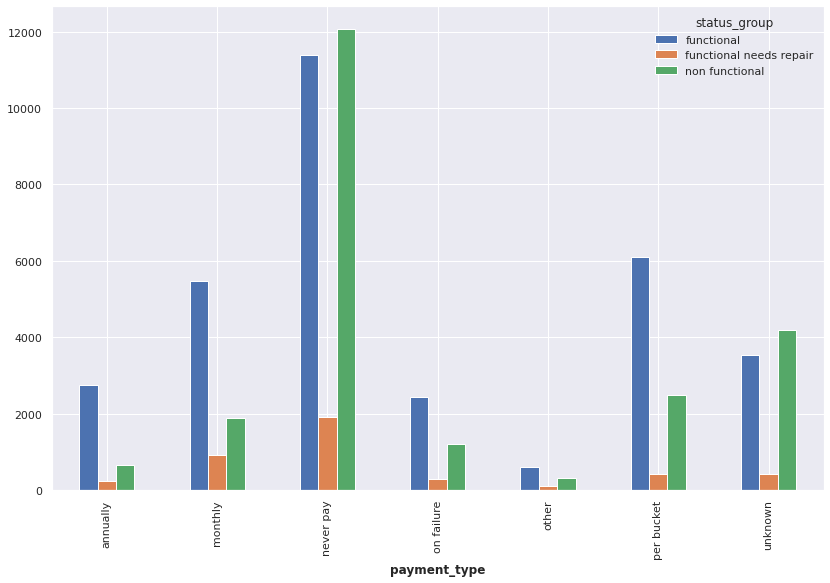

In [92]:
train_data.groupby(['payment_type','status_group'])['status_group'].size().unstack('status_group', fill_value=0).plot(kind='bar')

System is functional when the payments are made

###Basin vs status_group

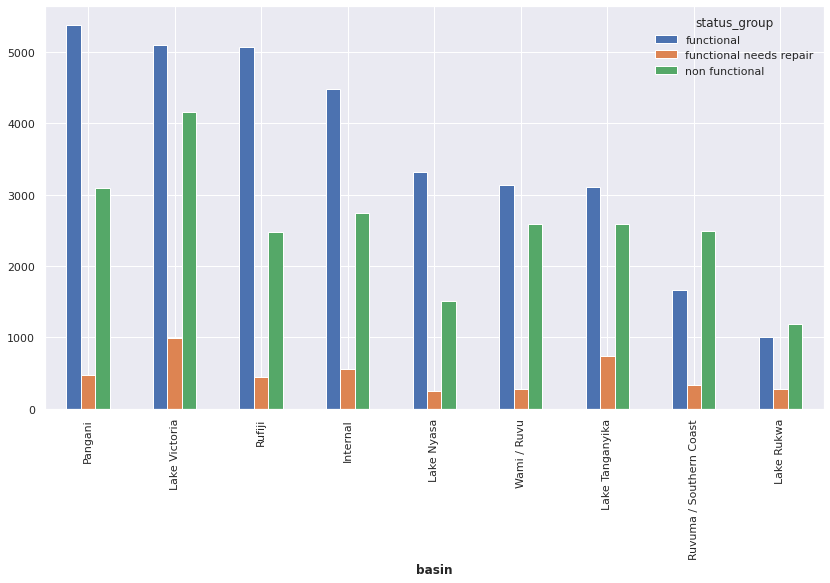

In [93]:
train_data.groupby(['basin','status_group'])['status_group'].size().unstack('status_group', fill_value=0).sort_values(by='functional', ascending=False).plot(kind='bar')

###Scheme vs status_group

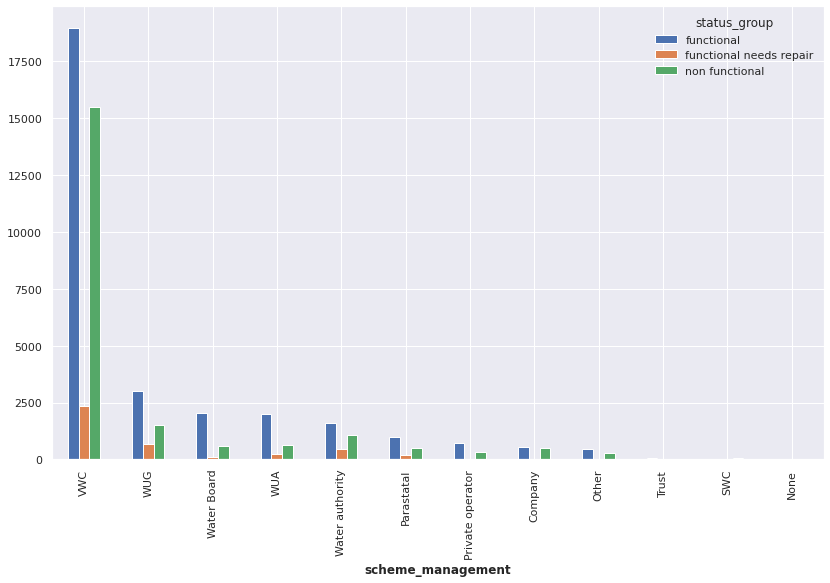

In [94]:
train_data.groupby(['scheme_management','status_group'])['status_group'].size().unstack('status_group', fill_value=0).sort_values(by='functional', ascending=False).plot(kind='bar')

#Transform Data

In [95]:
X_new = X_train.copy()
y_new = Y_train.copy()

##Categorical data

###Dropping features

I drop features with missing values as there are a lot of features, and the number of missing values is quite high

In [96]:
columns = ['funder', 'installer', 'subvillage', 'scheme_management', 'scheme_name']

Dropping features with too much values, and *recorded_by* which is constant

In [97]:
columns.extend(['wpt_name', 'num_private', 'ward', 'recorded_by'])

In [98]:
X_new = X_new.drop(columns, axis=1)
X_new.describe(include=['O'])

,date_recorded,basin,region,lga,public_meeting,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400,59400,59400,59400,56066,56344,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,9,21,125,2,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,2011-03-15,Lake Victoria,Iringa,Njombe,True,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,572,10248,5294,2503,51011,38852,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


###Filling missing values

In [99]:
X_new[['public_meeting', 'permit']] = X_new[['public_meeting', 'permit']].fillna(True)
X_new[['public_meeting', 'permit']] = X_new[['public_meeting', 'permit']].astype(int)  

###Feature encoding

Label encoding used for status_group

In [100]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(['non functional', 'functional needs repair', 'functional'])
y_new =  LabelEncoder().fit_transform(np.ravel(y_new))
y_new

array([0, 0, 0, ..., 0, 0, 0])

Frequancy encoding is used for following features

In [101]:
for feature in ['quantity_group', 'payment_type', 'quality_group', 'source_type', 'extraction_type_class', 'management', 'lga', 'region', 'waterpoint_type', 'basin', 'extraction_type', 'extraction_type_group', 'management_group', 'payment', 'water_quality', 'quantity_group', 'source', 'source_class', 'waterpoint_type_group', 'quantity']:
  enc_nom = (X_new.groupby(feature).size()) / len(X_new)
  X_new[feature] = X_new[feature].apply(lambda x : enc_nom[x])

In [102]:
X_new.head()

,amount_tsh,date_recorded,gps_height,longitude,latitude,basin,region,region_code,district_code,lga,population,public_meeting,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,1390,34.938093,-9.856322,0.085606,0.089125,11,5,0.009495,109,1,0,1999,0.450842,0.450842,0.450842,0.681936,0.883670,0.061313,0.061313,0.855522,0.855522,0.558687,0.558687,0.286549,0.286549,0.770943,0.480168,0.582912
8776,0.0,2013-03-06,1399,34.698766,-2.147466,0.172525,0.033148,20,2,0.012054,280,1,1,2010,0.450842,0.450842,0.450842,0.109680,0.883670,0.426734,0.426734,0.855522,0.855522,0.254697,0.254697,0.038636,0.038636,0.224377,0.480168,0.582912
34310,25.0,2013-02-25,686,37.460664,-3.821329,0.150505,0.026650,21,4,0.005185,250,1,1,2009,0.450842,0.450842,0.450842,0.681936,0.883670,0.151263,0.151263,0.855522,0.855522,0.558687,0.558687,0.011044,0.011044,0.224377,0.102744,0.582912
67743,0.0,2013-01-28,263,38.486161,-11.155298,0.075640,0.029125,90,63,0.002660,58,1,1,1986,0.080202,0.104024,0.104024,0.681936,0.883670,0.426734,0.426734,0.855522,0.855522,0.105152,0.105152,0.186448,0.201162,0.770943,0.102744,0.582912
19728,0.0,2011-07-13,0,31.130847,-1.825359,0.172525,0.055825,18,1,0.012980,0,1,1,0,0.450842,0.450842,0.450842,0.014209,0.015875,0.426734,0.426734,0.855522,0.855522,0.068182,0.068182,0.038636,0.038636,0.224377,0.480168,0.582912


##Numerical data

###Age of water pumps

In [103]:
X_new['year_recorded'] = X_new['date_recorded'].str[0:4].astype(int)
X_new.loc[(X_new.construction_year < 500), 'construction_year'] = np.nan
X_new['construction_year'] = X_new.construction_year.fillna(X_new.groupby('lga')['construction_year'].transform('mean'))
X_new['age'] = X_new.apply(lambda x: x['year_recorded'] - x['construction_year'] if x['year_recorded'] - x['construction_year'] > 0 else np.nan, axis=1)
X_new['age'] = X_new.age.fillna(np.nanmean(X_new.age))

In [104]:
X_new = X_new.drop(['date_recorded', 'year_recorded', 'construction_year', 'district_code'], axis=1)
X_new.head()

,amount_tsh,gps_height,longitude,latitude,basin,region,region_code,lga,population,public_meeting,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,age
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0.085606,0.089125,11,0.009495,109,1,0,0.450842,0.450842,0.450842,0.681936,0.883670,0.061313,0.061313,0.855522,0.855522,0.558687,0.558687,0.286549,0.286549,0.770943,0.480168,0.582912,12.000000
8776,0.0,1399,34.698766,-2.147466,0.172525,0.033148,20,0.012054,280,1,1,0.450842,0.450842,0.450842,0.109680,0.883670,0.426734,0.426734,0.855522,0.855522,0.254697,0.254697,0.038636,0.038636,0.224377,0.480168,0.582912,3.000000
34310,25.0,686,37.460664,-3.821329,0.150505,0.026650,21,0.005185,250,1,1,0.450842,0.450842,0.450842,0.681936,0.883670,0.151263,0.151263,0.855522,0.855522,0.558687,0.558687,0.011044,0.011044,0.224377,0.102744,0.582912,4.000000
67743,0.0,263,38.486161,-11.155298,0.075640,0.029125,90,0.002660,58,1,1,0.080202,0.104024,0.104024,0.681936,0.883670,0.426734,0.426734,0.855522,0.855522,0.105152,0.105152,0.186448,0.201162,0.770943,0.102744,0.582912,27.000000
19728,0.0,0,31.130847,-1.825359,0.172525,0.055825,18,0.012980,0,1,1,0.450842,0.450842,0.450842,0.014209,0.015875,0.426734,0.426734,0.855522,0.855522,0.068182,0.068182,0.038636,0.038636,0.224377,0.480168,0.582912,15.375488


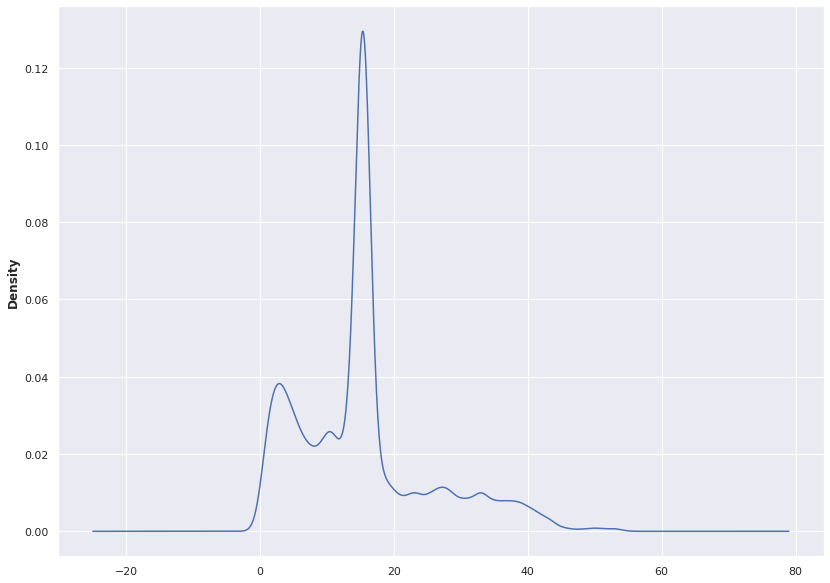

In [105]:
X_new.age.plot.kde()

In [106]:
X_new.describe()

,amount_tsh,gps_height,longitude,latitude,basin,region,region_code,lga,population,public_meeting,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,age
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.124264,0.056260,15.297003,0.012038,179.909983,0.914899,0.705522,0.249568,0.253411,0.305137,0.483973,0.785851,0.251781,0.251781,0.739894,0.740829,0.392884,0.392884,0.225290,0.234952,0.644720,0.339510,0.438179,15.375488
std,2997.574558,693.116350,6.567432,2.946019e+00,0.034630,0.020774,17.587406,0.008034,471.482176,0.279034,0.455812,0.184876,0.181226,0.149377,0.290665,0.269693,0.153678,0.153678,0.281623,0.279373,0.195015,0.195015,0.079230,0.067661,0.232047,0.152599,0.181179,10.022497
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.041313,0.013552,1.000000,0.000017,0.000000,0.000000,0.000000,0.000034,0.001650,0.001970,0.001313,0.009444,0.017744,0.017744,0.000286,0.003653,0.013283,0.013283,0.001111,0.004680,0.004680,0.000118,0.000118,1.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.100791,0.037054,5.000000,0.006717,0.000000,1.000000,0.000000,0.080202,0.104024,0.108249,0.109680,0.883670,0.137323,0.137323,0.855522,0.855522,0.254697,0.254697,0.186448,0.201162,0.770943,0.294411,0.294411,8.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.131061,0.055825,12.000000,0.010539,25.000000,1.000000,1.000000,0.137273,0.137273,0.277037,0.681936,0.883670,0.151263,0.151263,0.855522,0.855522,0.558687,0.558687,0.283232,0.283232,0.770943,0.294411,0.582912,15.375488
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.150505,0.078098,17.000000,0.014764,215.000000,1.000000,1.000000,0.450842,0.450842,0.450842,0.681936,0.883670,0.426734,0.426734,0.855522,0.855522,0.558687,0.558687,0.286549,0.286549,0.770943,0.480168,0.582912,17.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,0.172525,0.089125,99.000000,0.042138,30500.000000,1.000000,1.000000,0.450842,0.450842,0.450842,0.681936,0.883670,0.426734,0.426734,0.855522,0.855522,0.558687,0.558687,0.286549,0.286549,0.770943,0.480168,0.582912,53.000000


###Location coordinates

Replaced outliers with mean values of each region_code

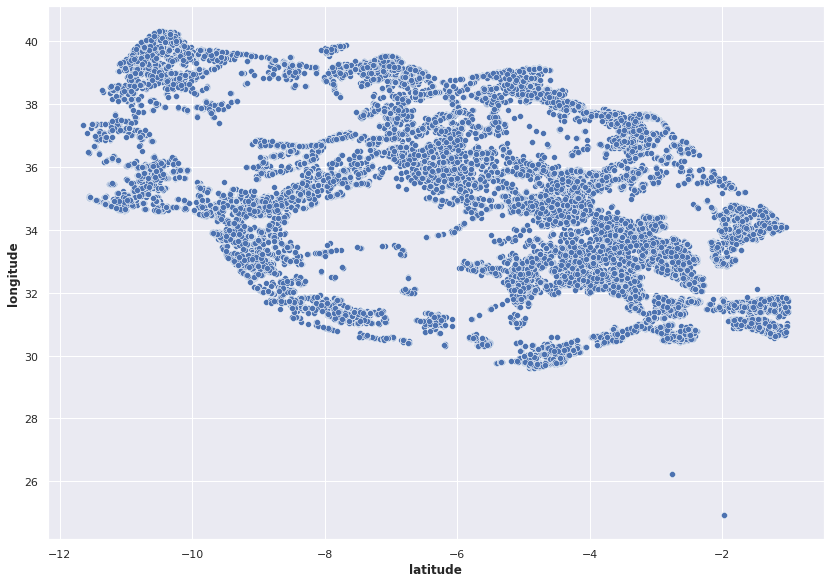

In [107]:
X_new.loc[(X_new.latitude > -1), 'latitude'] = X_new.groupby('region_code')['latitude'].transform('mean')
X_new.loc[(X_new.longitude < 28), 'longitude'] = X_new.groupby('region_code')['longitude'].transform('mean')
sns.scatterplot(x='latitude', y='longitude', data=X_new)

In [108]:
X_new.loc[(X_new.gps_height == 0), 'gps_height'] = X_new.groupby('region_code')['gps_height'].transform('mean')
X_new = X_new.drop('region_code', axis=1)

#Selecting features

###Creating baseline

In [113]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

# randomly split the data
train_x, test_x, train_y, test_y = train_test_split(X_new, y_new,test_size=0.25,random_state=0)

# shape of train and test splits
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((44550, 27), (14850, 27), (44550,), (14850,))

In [114]:
# create an object of the RandomForestRegressor
model_RFR = RandomForestClassifier(max_depth=10)

# fit the model with the training data
model_RFR.fit(train_x, train_y)

# predict the target on train and test data
predict_train = model_RFR.predict(train_x)
predict_test = model_RFR.predict(test_x)

print('Accuracy on train data: ', accuracy_score(train_y, predict_train))
print('Accuracy on test data: ',  accuracy_score(test_y, predict_test))

Accuracy on train data:  0.7843995510662177
Accuracy on test data:  0.7649158249158249


###Feature importance: Chi square

In [115]:
from sklearn.feature_selection import SelectKBest, chi2

def select_features(X_train, y_train, X_test, categorical_cols, k):
  fs = SelectKBest(score_func=chi2, k=k)
  fs.fit(X_train[categorical_cols], y_train)
  cols = fs.get_support()
  return X_train[categorical_cols].columns[cols].tolist()

In [116]:
# removed categories with simmilar features
categorical_cols = ['public_meeting', 'permit', 'quantity_group', 'payment_type', 'quality_group', 'source_type', 'management', 'lga', 'region', 'waterpoint_type', 'basin', 'extraction_type_group', 'management_group', 'source_class', 'quantity']
categorical_cols = select_features(train_x, train_y, test_x, categorical_cols, 15)
selected_cols = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population', 'age'] + categorical_cols
selected_cols

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'population',
 'age',
 'public_meeting',
 'permit',
 'quantity_group',
 'payment_type',
 'quality_group',
 'source_type',
 'management',
 'lga',
 'region',
 'waterpoint_type',
 'basin',
 'extraction_type_group',
 'management_group',
 'source_class',
 'quantity']

In [117]:
# training data with most important features
train_x_if = train_x[selected_cols]
test_x_if = test_x[selected_cols]

# create an object of the RandfomForestClassifier Model
model_RFR_with_if = RandomForestClassifier(max_depth=10,random_state=2)

# fit the model with the training data
model_RFR_with_if.fit(train_x_if, train_y)

# predict the target on the training and test data
predict_train_with_if = model_RFR_with_if.predict(train_x_if)
predict_test_with_if = model_RFR_with_if.predict(test_x_if)

# Root Mean Squared Error on the train and test data
print('Accuracy on train data: ', accuracy_score(train_y, predict_train_with_if))
print('Accuracy on test data: ',  accuracy_score(test_y, predict_test_with_if))

Accuracy on train data:  0.7878787878787878
Accuracy on test data:  0.768080808080808


#Selecting training algorithm

In [118]:
def transform_data(X):
  new_x = X.copy()
  # filling boolean values and transforming into int
  new_x[['public_meeting', 'permit']] = new_x[['public_meeting', 'permit']].fillna(True)
  new_x[['public_meeting', 'permit']] = new_x[['public_meeting', 'permit']].astype(int) 
  # frequancy encoding features
  for feature in ['quantity_group', 'payment_type', 'quality_group', 'source_type', 'extraction_type_class', 'management', 'lga', 'region', 'waterpoint_type', 'basin', 'extraction_type', 'extraction_type_group', 'management_group', 'payment', 'water_quality', 'quantity_group', 'source', 'source_class', 'waterpoint_type_group', 'quantity']:
    enc_nom = (new_x.groupby(feature).size()) / len(new_x)
    new_x[feature] = new_x[feature].apply(lambda x : enc_nom[x])
  # age of water pumps
  new_x['year_recorded'] = new_x['date_recorded'].str[0:4].astype(int)
  new_x.loc[(new_x.construction_year < 500), 'construction_year'] = np.nan
  new_x['construction_year'] = new_x.construction_year.fillna(new_x.groupby('lga')['construction_year'].transform('mean'))
  new_x['age'] = new_x.apply(lambda x: x['year_recorded'] - x['construction_year'] if x['year_recorded'] - x['construction_year'] > 0 else np.nan, axis=1)
  new_x['age'] = new_x.age.fillna(np.nanmean(new_x.age))
  # latitude logitude
  new_x.loc[(new_x.latitude > -1), 'latitude'] = new_x.groupby('region_code')['latitude'].transform('mean')
  new_x.loc[(new_x.longitude < 28), 'longitude'] = new_x.groupby('region_code')['longitude'].transform('mean')
  # gps_height
  new_x.loc[(new_x.gps_height == 0), 'gps_height'] = new_x.groupby('region_code')['gps_height'].transform('mean')
  # dropping features
  columns = ['funder', 'installer', 'subvillage', 'scheme_management', 'scheme_name', 'wpt_name', 'num_private', 'ward', 'recorded_by', 'region_code', 'date_recorded', 'year_recorded', 'construction_year', 'district_code']
  new_x = new_x.drop(columns, axis=1)
  return new_x

def select_features(X_train, y_train, categorical_cols, k):
  fs = SelectKBest(score_func=chi2, k=k)
  fs.fit(X_train[categorical_cols], y_train)
  cols = fs.get_support()
  return X_train[categorical_cols].columns[cols].tolist()

In [119]:
X_transformed = transform_data(X_train)

In [120]:
categorical_cols = ['public_meeting', 'permit', 'quantity_group', 'payment_type', 'quality_group', 'source_type', 'management', 'lga', 'region', 'waterpoint_type', 'basin', 'extraction_type_group', 'management_group', 'source_class', 'quantity']
selected_cols = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population', 'age'] + select_features(X_transformed, y_new, categorical_cols, 14)

In [121]:
# randomly split the data
train_x, test_x, train_y, test_y = train_test_split(X_transformed[selected_cols], y_new,test_size=0.25,random_state=0)

# shape of train and test splits
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((44550, 20), (14850, 20), (44550,), (14850,))

###Build base model

In [122]:
# create an object of the RandomForestRegressor
rf_base_Model = RandomForestClassifier(random_state = 35)

# fit the model with the training data
rf_base_Model.fit(train_x, train_y)

# predict the target on train and test data
predict_train = rf_base_Model.predict(train_x)
predict_test = rf_base_Model.predict(test_x)

print('Accuracy on train data: ', accuracy_score(train_y, predict_train))
print('Accuracy on test data: ',  accuracy_score(test_y, predict_test))

Accuracy on train data:  0.9954657687991021
Accuracy on test data:  0.8035016835016835


##Hyperparameter tuning

In [57]:
max_depth = [None] + [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [int(x) for x in np.linspace(2, 10, num = 4)]
min_samples_leaf = [int(x) for x in np.linspace(1, 8, num = 4)]
bootstrap = [True, False]

random_grid = {
  'max_depth': max_depth,
  'min_samples_split': min_samples_split,
  'min_samples_leaf': min_samples_leaf,
  'bootstrap': bootstrap
}

In [58]:
rf = RandomForestClassifier(random_state = 35)

In [59]:
from sklearn.model_selection import RandomizedSearchCV
rf_Grid = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [123]:
rf_Grid.fit(train_x, train_y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 20.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [124]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 40,
 'min_samples_leaf': 3,
 'min_samples_split': 7}

In [125]:
print('Accuracy on train data: ', rf_Grid.score(train_x, train_y))
print('Accuracy on test data: ',  rf_Grid.score(test_x, test_y))

Accuracy on train data:  0.9257463524130191
Accuracy on test data:  0.8092255892255892


#Work on test data

In [126]:
X_test_transformed = transform_data(X_test)
predict_result = rf_Grid.predict(X_test_transformed[selected_cols])

In [127]:
predict_labels = le.inverse_transform(predict_result)

In [128]:
data = pd.concat([pd.Series(X_test.index.tolist(),name='id'),pd.Series(predict_labels,name='status_group')], axis=1)

In [129]:
data.to_csv('sample.csv', index=False)
from google.colab import files
files.download("sample.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>